# Lava Framework Environment Verification Notebook

This notebook serves as a **comprehensive environment verification tool** to confirm that the Lava neuromorphic computing framework and all related dependencies are correctly installed and functioning in your development environment.

## 🎯 Purpose

This notebook is specifically designed to:
- ✅ Verify that the Lava framework is properly installed
- ✅ Test core Lava components (LIF neurons, Dense connections, Monitors)
- ✅ Validate the simulation environment configuration
- ✅ Ensure plotting and visualization capabilities are working
- ✅ Confirm the complete neuromorphic development pipeline is operational

> **Note:** This is an initialization and verification notebook. If all cells execute successfully without errors, your Lava environment is ready for neuromorphic computing experiments and development.

## 📋 What This Notebook Tests

### Core Framework Components
1. **Lava Process Imports** - Verifies LIF (Leaky Integrate-and-Fire) and Dense layer processes
2. **Essential Libraries** - Confirms NumPy and Matplotlib are available for data processing and visualization
3. **Neural Network Creation** - Tests instantiation of LIF neurons with various parameters
4. **Connectivity** - Validates process connections and data flow
5. **Monitoring System** - Checks the monitoring infrastructure for data collection
6. **Simulation Engine** - Tests the Loihi simulation configuration and execution
7. **Data Visualization** - Confirms plotting capabilities for neural activity analysis

### Expected Behavior
- **No Import Errors** - All Lava and supporting libraries load successfully
- **Process Creation** - Neural processes instantiate with correct parameters
- **Network Connectivity** - Processes connect without errors
- **Simulation Execution** - The network runs for the specified time steps
- **Data Collection** - Monitors successfully capture neural membrane voltages
- **Visualization** - Plots display neural activity over time

## 🚀 Usage Instructions

1. **Run All Cells Sequentially** - Execute each cell in order from top to bottom
2. **Check for Errors** - Any import errors or execution failures indicate missing dependencies
3. **Verify Outputs** - Ensure plots are generated showing neural membrane voltage traces
4. **Environment Status** - If all cells complete successfully, your environment is ready

---

## 1. Framework Import Verification

First, we'll test if all required Lava framework components and supporting libraries can be imported successfully. This step verifies that the installation is complete and accessible.

In [1]:
from lava.proc.lif.process import LIF
from lava.proc.dense.process import Dense
import numpy as np
import matplotlib
from matplotlib import pyplot as plt

## 2. Neural Process Creation

Create LIF (Leaky Integrate-and-Fire) neurons and Dense connection layers to test the core neuromorphic computing components of the Lava framework.

In [2]:
# Create processes
lif1 = LIF(shape=(3, ),                         # Number and topological layout of units in the process
           vth=10.,                             # Membrane threshold
           dv=0.1,                              # Inverse membrane time-constant
           du=0.1,                              # Inverse synaptic time-constant
           bias_mant=[1.1, 1.2, 1.3],           # Bias added to the membrane voltage in every timestep
           name="lif1")

dense = Dense(weights=np.random.rand(2, 3),     # Initial value of the weights, chosen randomly
              name='dense')

lif2 = LIF(shape=(2, ),                         # Number and topological layout of units in the process
           vth=10.,                             # Membrane threshold
           dv=0.1,                              # Inverse membrane time-constant
           du=0.1,                              # Inverse synaptic time-constant
           bias_mant=0.,                        # Bias added to the membrane voltage in every timestep
           name='lif2')

## 3. Process Port Inspection

Inspect the input and output ports of each process to verify proper instantiation and port configuration.

In [3]:
for proc in [lif1, lif2, dense]:
    for port in proc.in_ports:
        print(f'Proc: {proc.name:<5}  Name: {port.name:<5}  Size: {port.size}')
    for port in proc.out_ports:
        print(f'Proc: {proc.name:<5}  Name: {port.name:<5}  Size: {port.size}')

Proc: lif1   Name: a_in   Size: 3
Proc: lif1   Name: s_out  Size: 3
Proc: lif2   Name: a_in   Size: 2
Proc: lif2   Name: s_out  Size: 2
Proc: dense  Name: s_in   Size: 3
Proc: dense  Name: a_out  Size: 2


Inspect Variables of each process to verify proper instantiate configuration.


In [4]:
for var in lif1.vars:
    print(f'Var: {var.name:<9}  Shape: {var.shape}  Init: {var.init}')

Var: bias_exp   Shape: (3,)  Init: 0
Var: bias_mant  Shape: (3,)  Init: [1.1, 1.2, 1.3]
Var: du         Shape: (1,)  Init: 0.1
Var: dv         Shape: (1,)  Init: 0.1
Var: u          Shape: (3,)  Init: 0
Var: v          Shape: (3,)  Init: 0
Var: vth        Shape: (1,)  Init: 10.0


Inspect Weights of Dense which connected between `lif1` and `lif2`.

In [5]:
dense.weights.get()

array([[0.30770121, 0.36852873, 0.79742252],
       [0.07700503, 0.08554452, 0.05331411]])

## 4. Network Connectivity

Connect the neural processes to create a simple neural network and verify that the connection system works correctly.

In [6]:
lif1.s_out.connect(dense.s_in)
dense.a_out.connect(lif2.a_in)

## 5. Monitoring System Setup

Set up monitors to capture neural activity data during simulation, testing the data collection infrastructure.

In [7]:
from lava.proc.monitor.process import Monitor

monitor_lif1 = Monitor()
monitor_lif2 = Monitor()

num_steps = 100

# Add Monitor to LIF Precesses
monitor_lif1.probe(lif1.v, num_steps)
monitor_lif2.probe(lif2.v, num_steps)

## 6. Simulation Configuration

Configure the simulation parameters and runtime environment for executing the neural network.

In [8]:
from lava.magma.core.run_conditions import RunSteps

run_condition = RunSteps(num_steps=num_steps)

## 7. Network Execution

Run the neural network simulation to verify that the complete pipeline works correctly.

In [9]:
from lava.magma.core.run_configs import Loihi1SimCfg

run_cfg = Loihi1SimCfg(select_tag="floating_pt")

In [10]:
lif2.run(condition=run_condition, run_cfg=run_cfg)

## 8. Data Visualization and Analysis

Retrieve the recorded data and create visualizations to confirm that the monitoring and plotting systems are functioning properly.

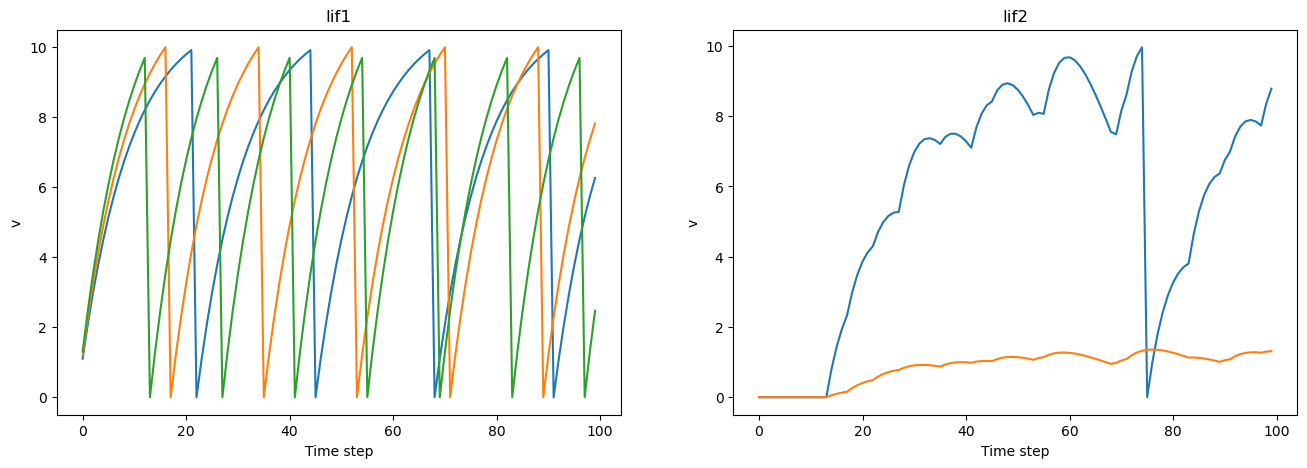

In [11]:
data_lif1 = monitor_lif1.get_data()
data_lif2 = monitor_lif2.get_data()

# Create a subplot for each monitor
fig = plt.figure(figsize=(16, 5))
ax0 = fig.add_subplot(121)
ax1 = fig.add_subplot(122)

# Plot the recorded data
monitor_lif1.plot(ax0, lif1.v)
monitor_lif2.plot(ax1, lif2.v)

## 9. Cleanup and Completion

Stop the simulation and clean up resources. If you've reached this point without errors, your Lava environment is fully operational!

In [12]:
lif2.stop()